In [1]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import itertools
import time


In [2]:
model = Sequential()  
# a = []

In [3]:
class Onehot2Int(object):
    """To plot the decision boundary"""
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [4]:
def theOriginalNN(X,Y):
    """
    The NN model which we will train and get the weights for the new
    NN model
    """    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    

    feature_vector_shape = len(X_train[0])
    input_shape = (feature_vector_shape,)
#     print("Input shape",input_shape)
#     print(f'Feature shape: {input_shape}')
    
    model.add(Dense(2,input_shape=input_shape, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))  


 
    es = [EarlyStopping(monitor='loss', mode='min', verbose=0, patience=500)]

    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
   

    print("Weights and biases of the layers before training the model: \n")
    #a=[]
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
            #a=np.append(layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

#     print(X_train.shape,Y_train.shape)
#     print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_tr = Y_train
    Y_train = to_categorical(Y_train)
#     print(Y_train.shape)
    Y_test = to_categorical(Y_test)
    
   
    e = 500   #The number of epochs
    #obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, callbacks=es)
    obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, epochs = e)
    
    print("Weights and biases of the layers after training the model: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
        
    #predict
    # pred = model.predict(X_train)
    # print("After Prediction of model", pred)
   
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Loss = np.transpose(Loss)
    print(Loss.shape)
    #print(Loss.shape)
    hist = obj.history["accuracy"]
    #n_epochs_best = np.argmax(hist)
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    graph_it(Loss, Epoch, Accuracy,scores,X_train, X_test, Y_train, Y_test, Y_tt)
    
        
    #Get the original weights
    a=[]
    for layer in model.layers:
        a = np.append(a,layer.get_weights()[0])
        
    return a


In [5]:
def graph_it(Loss, Epoch, Accuracy,scores,X_train, X_test, Y_train, Y_test,Y_tt):
    """
    Creating all the graphs:
    1. Loss vs Epoch
    2. Accuracy vs Epoch
    3. The decision boundarys
    """
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    # Plot decision boundary
    keras_model_no_ohe = Onehot2Int(model)

    # Plot decision boundary
    
    plt.figure(figsize=(10,7))
    plot_decision_regions(X_test, Y_tt, clf=keras_model_no_ohe, legend=2)
    plt.show()
    
    

In [6]:
def theNewNN(X,Y,a):
    """
    The NN model which will be trained by the weights 
    we got by the OriginalNN()
    """
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    # es = EarlyStopping(monitor='loss', mode='min', verbose=0, patience=50)

    # model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
    
#     print(X_train.shape,Y_train.shape)
#     print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_train = to_categorical(Y_train)
#     print(Y_train.shape)
    Y_test = to_categorical(Y_test)
    

    
    # Setting new weights and biases
    # for layer in model.layers:
    #     a,b = layer.get_weights()[0].shape
    #     layer.set_weights([np.random.randn(a,b), np.ones(layer.get_weights()[1].shape)])


        
    es = [EarlyStopping(monitor='loss', mode='min', verbose=0, patience=500)]

    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'], loss_weights = a)

    print("Weights and biases of the layers after setting the new weights and biases: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
   
    e = 5000   #The number of epochs
    #obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, callbacks=es)
    obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, epochs=e)
    
    print("Weights and biases of the layers after setting the new weights and biases: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
    print("Bias")
    print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
    
    
    #predict
#     pred = model.predict(X_train)
#     print("After Prediction of model", pred)
    
    scores = model.evaluate(X_test, Y_test)
    L = np.array(obj.history["loss"])
    
    E = np.arange(e)
    A = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    graph_it(L, E, A,scores,X_train, X_test, Y_train, Y_test, Y_tt)


    



In [7]:
#Old Dataset
def OldDataset():
    """
    The dataset for the original model
    """
    #Class 1
    mean = [5,5]
    cov = [[10,0],
           [0,10]] 
    Class1 = np.random.multivariate_normal(mean,cov,1000)

    #Class 2
    mean = [-5,5]
    cov = [[10,0],
           [0,10]] 
    Class2 = np.random.multivariate_normal(mean,cov,1000)    
    

    X = np.vstack([Class1, Class2])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    a = theOriginalNN(X,Y)
    return a
    

In [8]:
#New Dataset
def NewDataset(i,a):
    """
    The dataset for the new model
    """
    #Class 3
    mean = [i,i]
    cov = [[50,0],
           [0,50]] 
    Class3 = np.random.multivariate_normal(mean,cov,1000)

    #Class 4
    mean = [(-i),i]
    cov = [[50,0],
           [0,50]] 
    Class4 = np.random.multivariate_normal(mean,cov,1000)
    
    X = np.vstack([Class3, Class4])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    
    
    theNewNN(X,Y,a)

****************************The Original NN*************************************


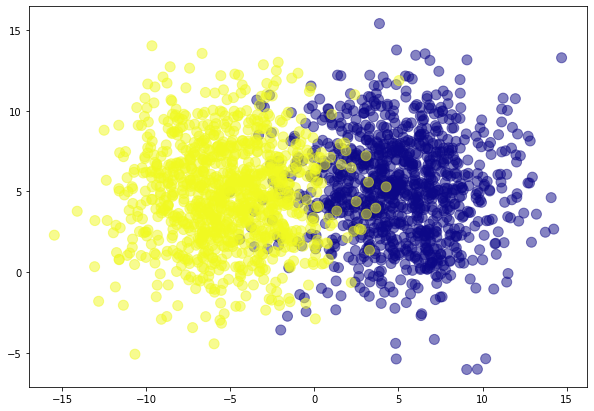

Weights and biases of the layers before training the model: 

dense
Weights
Shape:  (2, 2) 
 [[-0.75090724 -0.14018369]
 [ 1.2205147   0.78347456]]
Bias
Shape:  (2,) 
 [0. 0.] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.38395405  0.07497716  0.34308052]
 [-0.03062463 -0.57631993 -0.8233979   0.9116094 ]]
Bias
Shape:  (4,) 
 [0. 0. 0. 0.] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.22156167  0.01775861]
 [-0.669642   -0.13544178]
 [ 0.6625266  -0.6818812 ]]
Bias
Shape:  (2,) 
 [0. 0.] 

Weights and biases of the layers after training the model: 

dense
Weights
Shape:  (2, 2) 
 [[-1.1678042   0.6689539 ]
 [ 0.66968656  0.346185  ]]
Bias
Shape:  (2,) 
 [1.6608849  0.31693152] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.6078119   0.2808237   0.15349904]
 [-0.03062463 -0.05038119 -0.17905165  0.8103856 ]]
Bias
Shape:  (4,) 
 [0.         0.4308574  0.23232429 0.10440325] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.4305131   0.2267

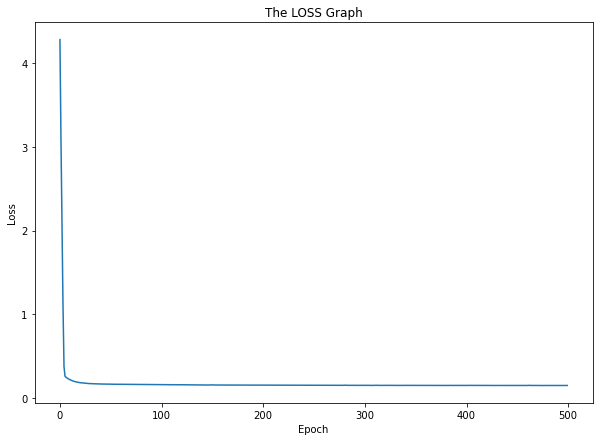

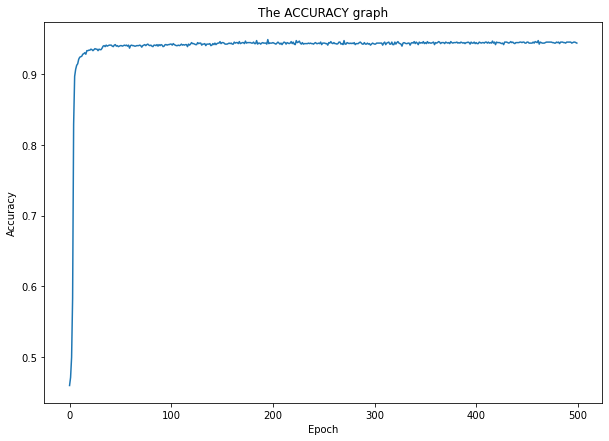

Test results - Loss: 0.14523600041866302 - Accuracy: 94.33333277702332%


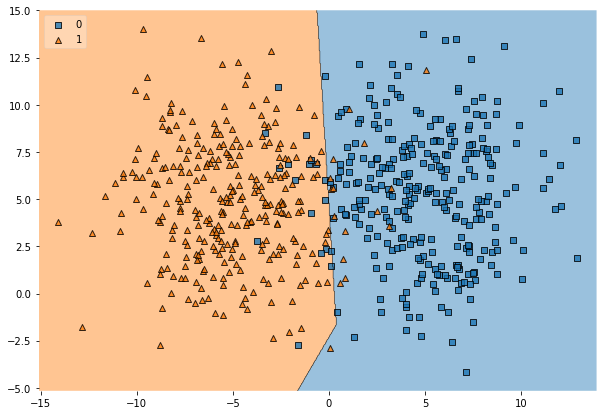


**************************The  4.0  NN************************************


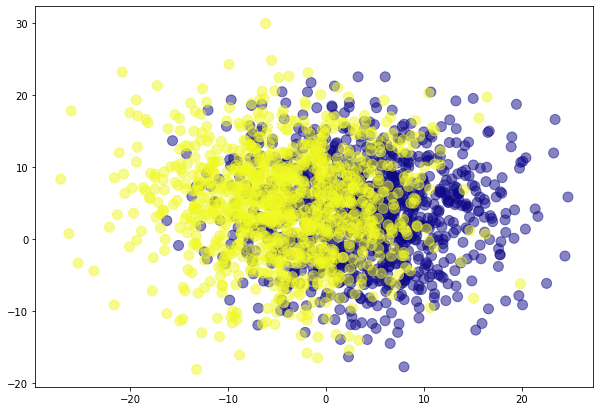

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.1678042   0.6689539 ]
 [ 0.66968656  0.346185  ]]
Bias
Shape:  (2,) 
 [1.6608849  0.31693152] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.6078119   0.2808237   0.15349904]
 [-0.03062463 -0.05038119 -0.17905165  0.8103856 ]]
Bias
Shape:  (4,) 
 [0.         0.4308574  0.23232429 0.10440325] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.4305131   0.22670932]
 [-0.71557605 -0.08951017]
 [ 0.51768434 -0.53703904]]
Bias
Shape:  (2,) 
 [ 0.18440302 -0.18440275] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.85620815  0.74974704]
 [ 0.05596201 -0.26470914]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.37050742 -0.08642334 -6.3636584 ]
 [-0.03062463  0.50666547 -0.19860522  0.65709615]]
dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.41077518  0.20696682]
 [-0.638433

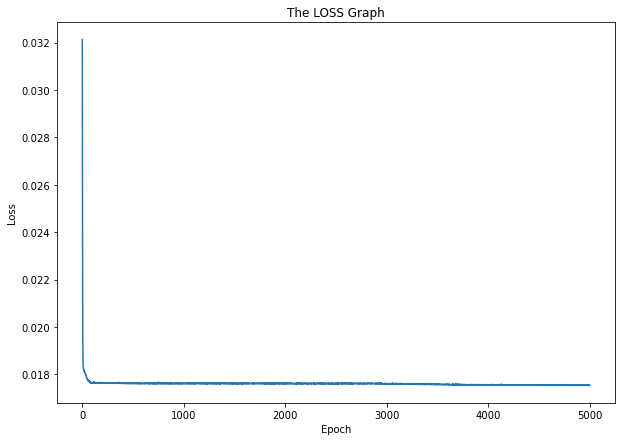

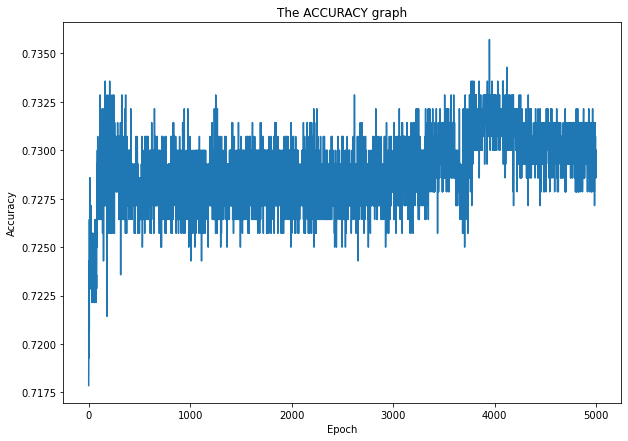

Test results - Loss: 0.019624171778559685 - Accuracy: 69.16666626930237%


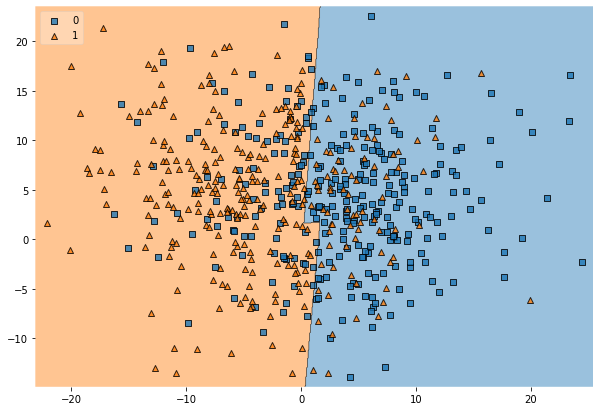


**************************The  6.6  NN************************************


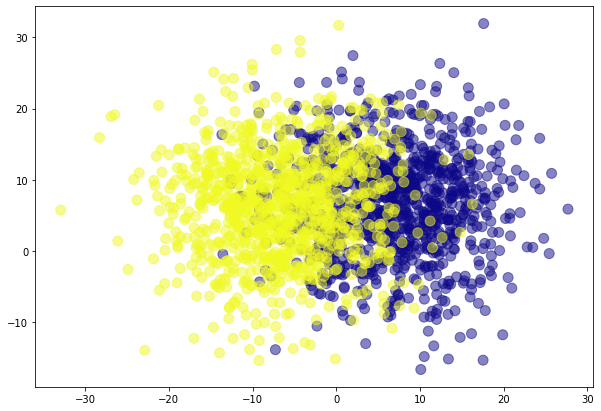

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.85620815  0.74974704]
 [ 0.05596201 -0.26470914]]
Bias
Shape:  (2,) 
 [1.4030861  0.26123086] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.37050742 -0.08642334 -6.3636584 ]
 [-0.03062463  0.50666547 -0.19860522  0.65709615]]
Bias
Shape:  (4,) 
 [ 0.          0.05202107  0.730874   -0.14243114] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.41077518  0.20696682]
 [-0.6384339  -0.1666342 ]
 [ 0.37318766 -0.3925446 ]]
Bias
Shape:  (2,) 
 [ 0.31075615 -0.31075615] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.9500207   1.0176611 ]
 [-0.00629635  0.0278881 ]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.41674498 -0.10404661 -6.1421905 ]
 [-0.03062463  0.7502656  -0.13263771  0.77167535]]
dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.58535933  0.38154683]
 [-0.81

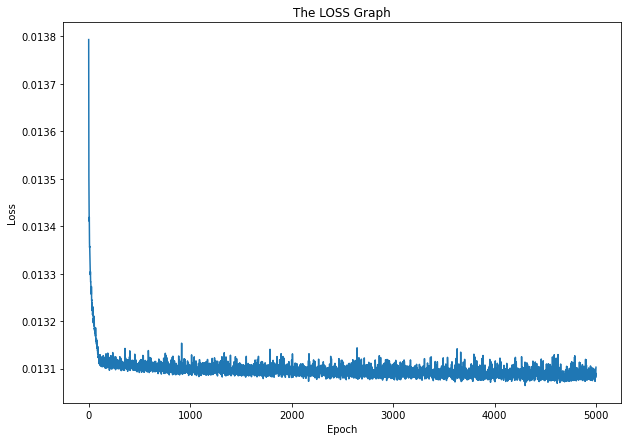

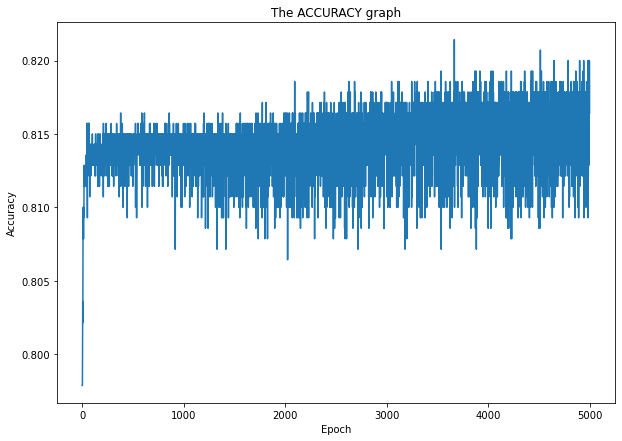

Test results - Loss: 0.012814799323678017 - Accuracy: 81.16666674613953%


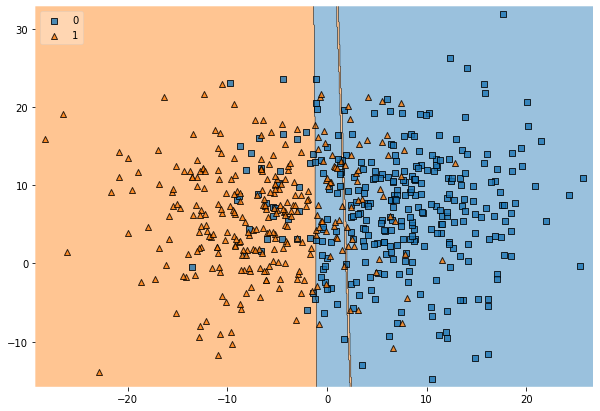


**************************The  9.2  NN************************************


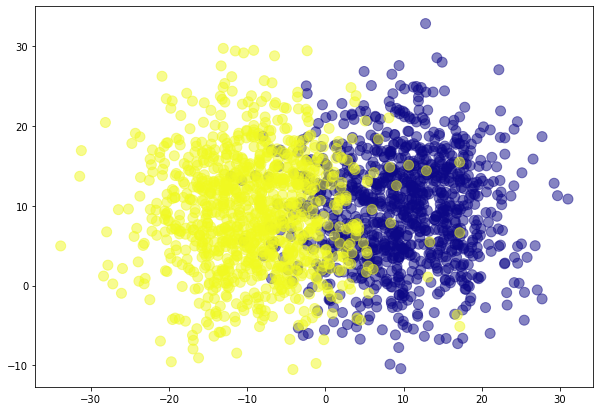

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.9500207   1.0176611 ]
 [-0.00629635  0.0278881 ]]
Bias
Shape:  (2,) 
 [ 0.78706384 -0.927127  ] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.41674498 -0.10404661 -6.1421905 ]
 [-0.03062463  0.7502656  -0.13263771  0.77167535]]
Bias
Shape:  (4,) 
 [ 0.0000000e+00 -5.4777489e-04  1.3151686e+00 -7.8095847e-01] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.58535933  0.38154683]
 [-0.8105035   0.00543505]
 [ 0.59631217 -0.6156662 ]]
Bias
Shape:  (2,) 
 [ 0.83011687 -0.83011615] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.7718536   0.9787346 ]
 [-0.02332603  0.04086691]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.47483784 -0.03205266 -6.1421905 ]
 [-0.03062463  0.8819522  -0.30614594  0.84907186]]
dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.67418295  0.470

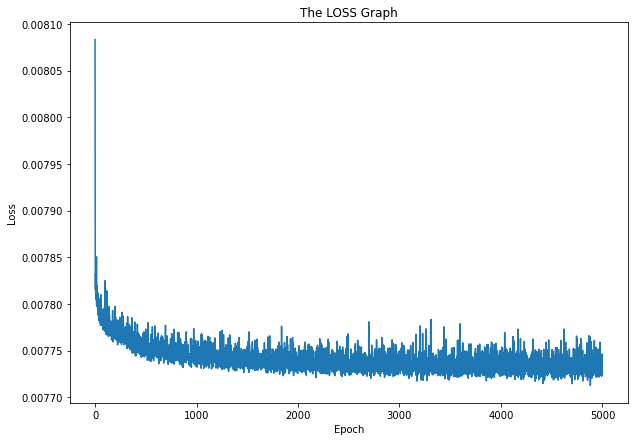

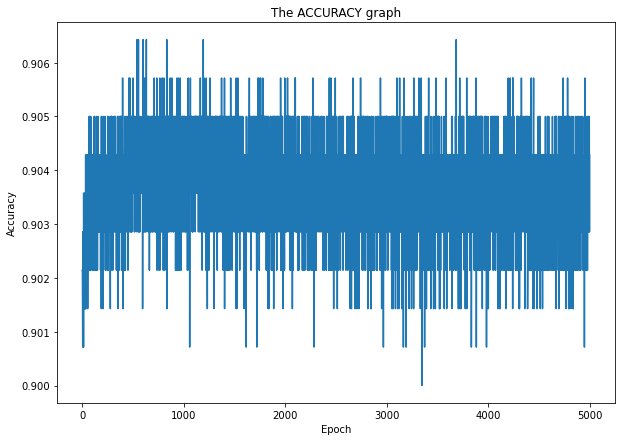

Test results - Loss: 0.007249623071402311 - Accuracy: 90.66666960716248%


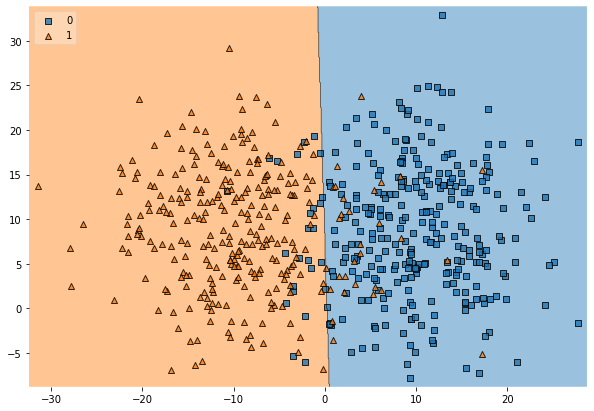


**************************The  11.799999999999999  NN************************************


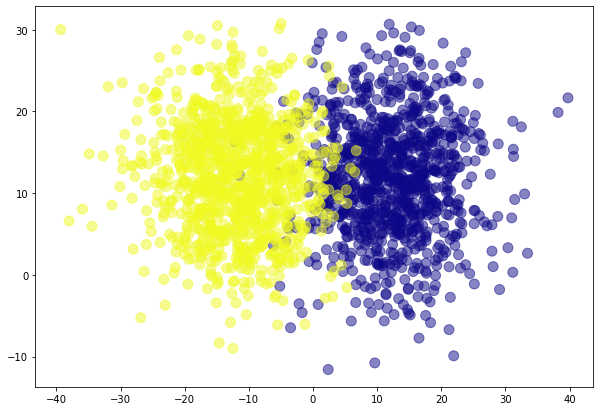

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.7718536   0.9787346 ]
 [-0.02332603  0.04086691]]
Bias
Shape:  (2,) 
 [ 0.9863287 -1.8129314] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.47483784 -0.03205266 -6.1421905 ]
 [-0.03062463  0.8819522  -0.30614594  0.84907186]]
Bias
Shape:  (4,) 
 [ 0.          0.00356336  1.8488555  -0.56438476] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.67418295  0.47036868]
 [-1.2478666   0.44280446]
 [ 0.65280616 -0.6721606 ]]
Bias
Shape:  (2,) 
 [ 1.7629992 -1.7629967] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.317243    1.338025  ]
 [-0.00702715  0.06810711]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.75934285 -0.12440711  0.36741698]
 [-0.03062463  0.99480265 -0.11268269  1.100738  ]]
dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.94982564  0.74604255]
 [-1.3505

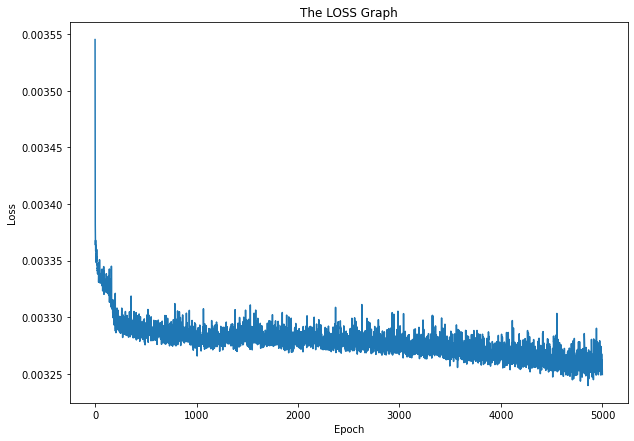

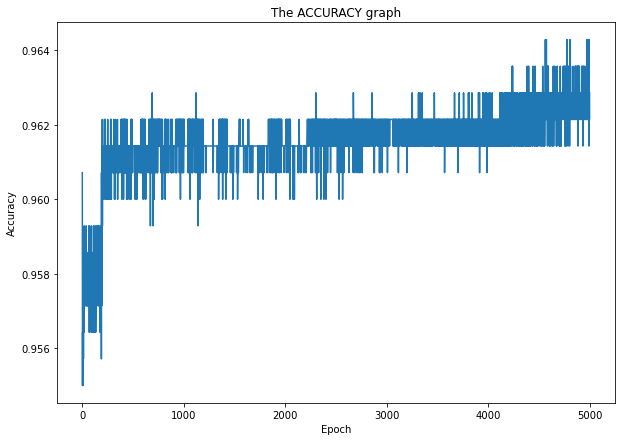

Test results - Loss: 0.004104707855731249 - Accuracy: 94.9999988079071%


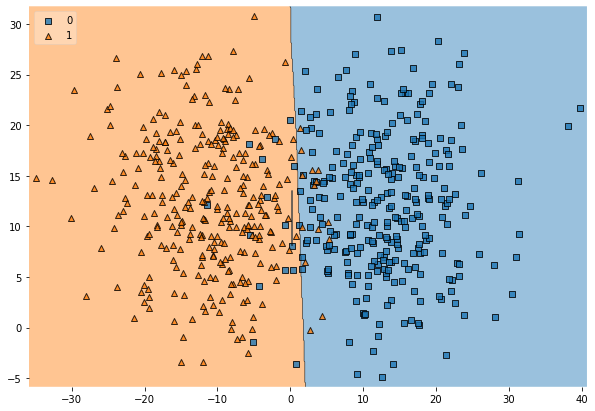


**************************The  14.399999999999999  NN************************************


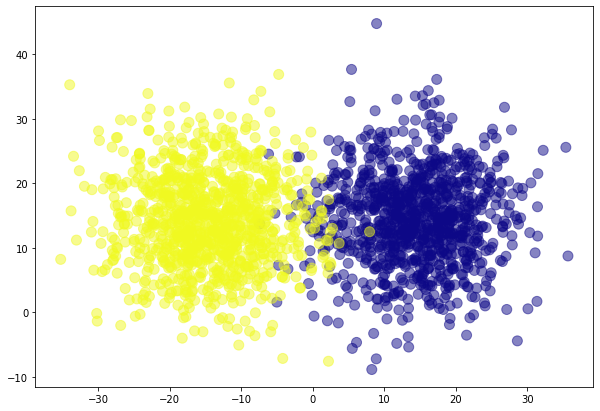

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.317243    1.338025  ]
 [-0.00702715  0.06810711]]
Bias
Shape:  (2,) 
 [ 1.1020893 -2.102969 ] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.75934285 -0.12440711  0.36741698]
 [-0.03062463  0.99480265 -0.11268269  1.100738  ]]
Bias
Shape:  (4,) 
 [ 0.0000000e+00 -5.2632135e-01  2.1598303e+00  2.0004925e-03] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.94982564  0.74604255]
 [-1.3505973   0.54555506]
 [ 0.8755499  -0.8948674 ]]
Bias
Shape:  (2,) 
 [ 1.7440286 -1.7440184] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.2709502   0.9916949 ]
 [ 0.1206018   0.06309223]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.8764138  -0.22232795  0.3823031 ]
 [-0.03062463  0.8308969  -0.17449844  1.1867803 ]]
dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.9894851   0.7856598

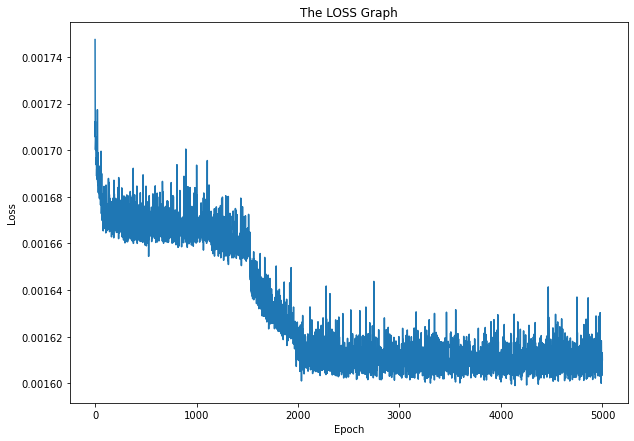

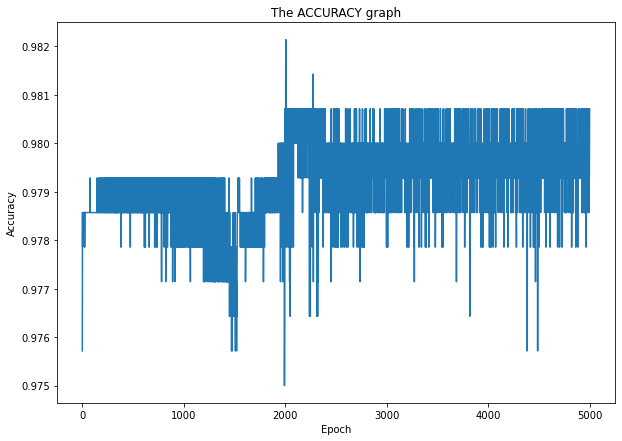

Test results - Loss: 0.0016904291696846485 - Accuracy: 97.66666889190674%


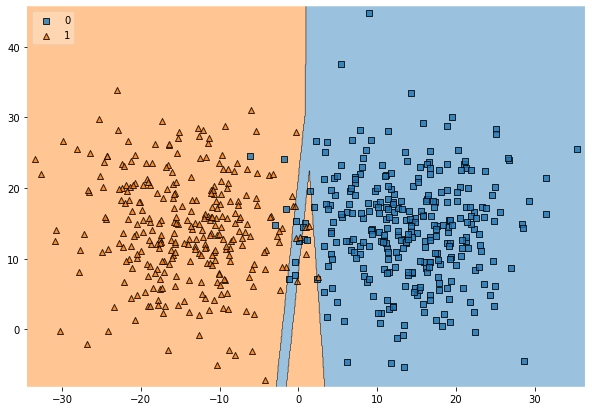


**************************The  17.0  NN************************************


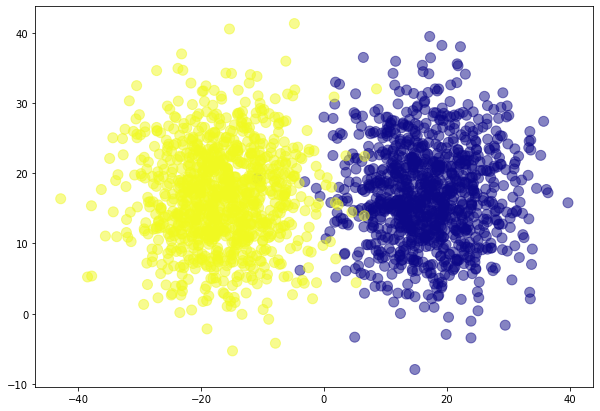

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.2709502   0.9916949 ]
 [ 0.1206018   0.06309223]]
Bias
Shape:  (2,) 
 [-0.9045643 -2.7797844] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.8764138  -0.22232795  0.3823031 ]
 [-0.03062463  0.8308969  -0.17449844  1.1867803 ]]
Bias
Shape:  (4,) 
 [ 0.         -0.53328234  2.2646954   0.14210133] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.9894851   0.7856598 ]
 [-1.3150749   0.51005375]
 [ 0.81582284 -0.8351699 ]]
Bias
Shape:  (2,) 
 [ 1.9157577 -1.915746 ] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.6486355   1.2063509 ]
 [-0.05756396 -0.03044519]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.9058365  -0.12583381  0.263474  ]
 [-0.03062463  0.8623317  -0.08694578  1.1027384 ]]
dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.8957206   0.69191086]
 [-1.0833

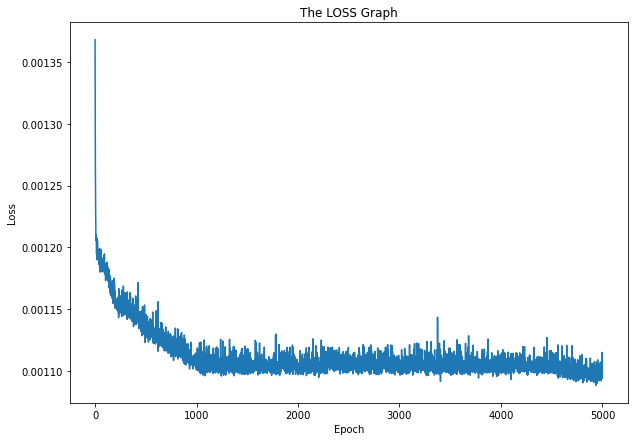

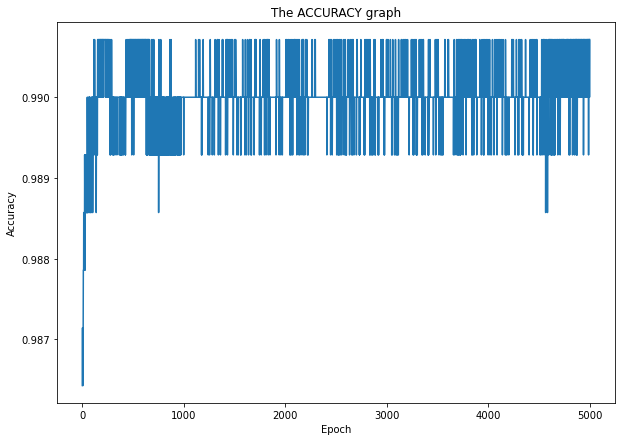

Test results - Loss: 0.0008248959202319384 - Accuracy: 99.16666746139526%


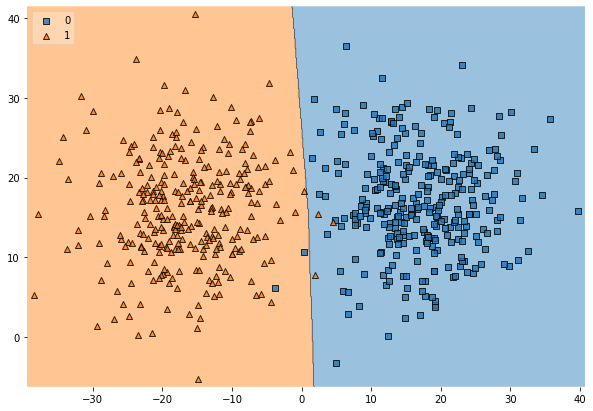


**************************The  19.599999999999998  NN************************************


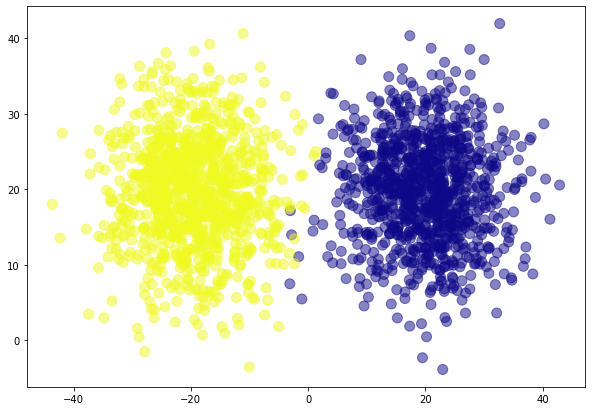

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.6486355   1.2063509 ]
 [-0.05756396 -0.03044519]]
Bias
Shape:  (2,) 
 [ 2.427835  -0.6396862] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.9058365  -0.12583381  0.263474  ]
 [-0.03062463  0.8623317  -0.08694578  1.1027384 ]]
Bias
Shape:  (4,) 
 [ 0.         -0.21968067  2.2995195  -0.02820041] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.5113933  -0.4185686 ]
 [-0.8957206   0.69191086]
 [-1.0833206   0.2783463 ]
 [ 0.72162765 -0.74093986]]
Bias
Shape:  (2,) 
 [ 1.8125892 -1.8125697] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.82679087  1.7131598 ]
 [ 0.32986286 -0.11361013]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.5137973   0.7854888  -0.40268514  0.16851959]
 [-0.03062463 -1.7249002   1.8388938   3.7158194 ]]
dense_2
Weights
Shape:  (4, 2) 
 [[  0.5113933   -0.4185686 ]
 [ -0.7583748    0.5544441 ]
 [ 12

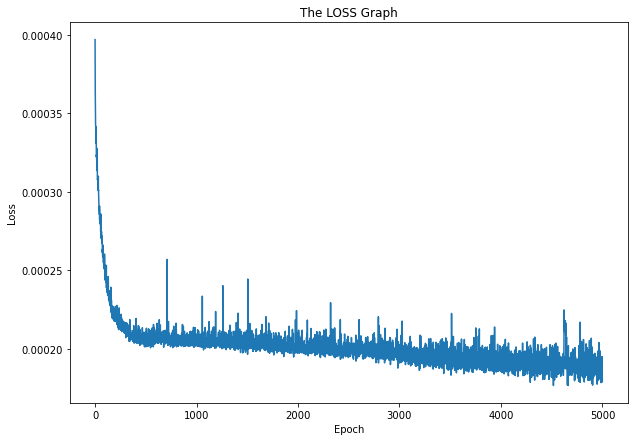

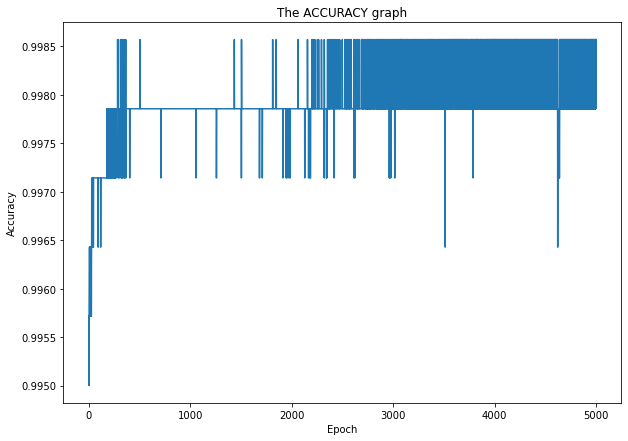

Test results - Loss: 0.0005272491252981126 - Accuracy: 99.6666669845581%


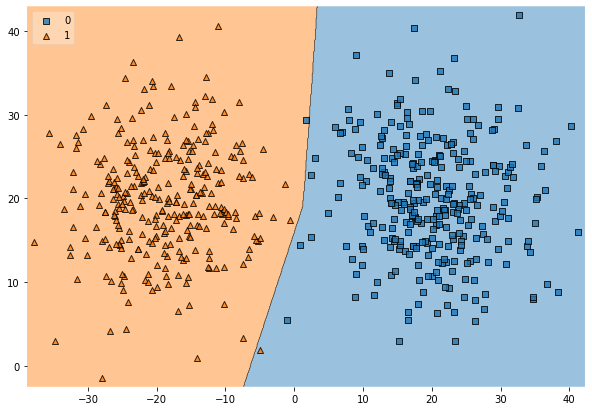

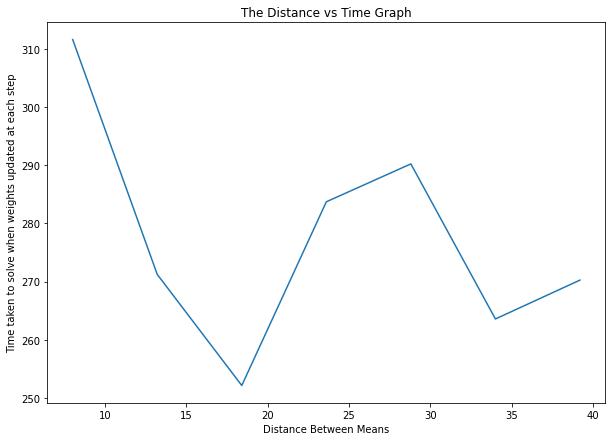

In [9]:
def main():
    dist = []
    timeArr = []
    print("****************************The Original NN*************************************")
    a = OldDataset()
    for i in np.arange(4,20,2.6): 
        
        print("\n**************************The ",i," NN************************************")
        begin = time.time()
        NewDataset(i,a)
        end = time.time()
        m1=np.array((i,i))
        m2 = np.array(((-i),i))
        dist = np.append(dist,[np.linalg.norm(m1-m2)])
        #time.sleep(1)
        timeArr = np.append(timeArr,[end-begin])
    
    plt.figure(figsize=(10,7))
    plt.plot(dist, timeArr)
    plt.xlabel("Distance Between Means")
    plt.ylabel("Time taken to solve when weights updated at each step")
    plt.title("The Distance vs Time Graph")
    plt.show()
        
        
    
    
#     print("****************************THE NEW NN**********************************")
#     NewDataset(4,a)
    
if __name__ == "__main__":
    main()